In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('listings.csv')

df = df[df.minimum_nights < 30]
df = df[df.price < 300]
df = df[df.room_type.apply(lambda x: x in ('Entire home/apt', 'Private room'))]
df['room_type'] = df['room_type'].replace({'Entire home/apt':1, 'Private room':2})
df = df[['room_type', 'minimum_nights', 'price']]
df.corr()

,room_type,minimum_nights,price
room_type,1.000000,-0.102199,-0.491517
minimum_nights,-0.102199,1.000000,-0.028234
price,-0.491517,-0.028234,1.000000


Text(0.5, 1.0, 'Price vs minimum nights for Airbnb listings,\ncolored by accomodation type')

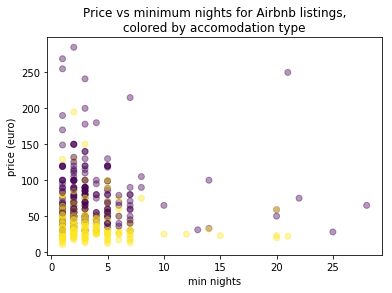

In [3]:
df_sampled = df.sample(500)
plt.scatter(x=df_sampled['minimum_nights'], y=df_sampled['price'], c=df_sampled['room_type'],
           alpha=.4)
plt.xlabel('min nights')
plt.ylabel('price (euro)')
plt.title('Price vs minimum nights for Airbnb listings,\ncolored by accomodation type')

In [5]:
df_sampled['room_type']=df_sampled['room_type'].replace({1:'Entire home', 2:'Private room'})
df_sampled.to_csv('../berlin_airbnb.csv', index=False)

In [18]:
def euclidean(x1, x2, y1, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

df_sampled_sorted = df_sampled
df_sampled_sorted['distance'] = df_sampled.apply(
    lambda r: euclidean(8, r['minimum_nights'], 160, r['price']),
    axis=1
)
df_sampled_sorted = df_sampled.sort_values(by='distance')
part1 = df_sampled_sorted[:50]
part2 = df_sampled_sorted[51:].sample(100)
df_sampled_sorted_small = pd.concat([part1, part2]).sample(frac=1).sort_values(by='distance')
df_sampled_sorted_small.to_csv('../berlin_airbnb_small.csv', index=False)

In [8]:
4 if 1 else 0

4